## A) Create MySQL DataBase

In [2]:
import mysql.connector as mysql

user, pw, host = 'root', '83219449dD$$', '127.0.0.1'

mydb = mysql.connect(user=user, password=pw, host=host)

mycursor = mydb.cursor()

try:
    print("Execute MySQL to create Database!")
    mycursor.execute("CREATE DATABASE moh_top_5_cancers")
    print("DATABASE CREATED!")
except:
    print("Unexpected Error!")
    exit()
finally:
    mycursor.close()
    mydb.close()

Execute MySQL to create Database!
DATABASE CREATED!


## B) Create Table in MySQL DataBase

In [3]:
import mysql.connector as mysql

user, pw, host, db = 'root', '83219449dD$$', '127.0.0.1', 'moh_top_5_cancers'

mycursor = mysql.connect(user=user, password = pw, host=host, database = db)
cursor = mycursor.cursor()

create_table = ("CREATE TABLE cancers(start_of_period VARCHAR(50), end_of_period VARCHAR(50), gender VARCHAR(50), type_of_cancer VARCHAR(50), incidence_rate FLOAT(20), ranks INT(20))")

try:
    print("Execute MySQL to create table!")
    cursor.execute(create_table)
    mycursor.commit()
    print("Table Created!")
except:
    print("Unexpected Error!")
    exit()
finally:
    cursor.close()
    mycursor.close()

Execute MySQL to create table!
Table Created!


## C) Insert Data into MySQL DataBase

In [4]:
import mysql.connector as mysql
import pandas as pd

filename = 'C:\\Users\Jeffrey Wong\SP_Assignment_2\Top-five-leading-cancers-by-gender.csv'

df = pd.read_csv(filename)

user, pw, host, db = 'root', '83219449dD$$', '127.0.0.1', 'moh_top_5_cancers'
mycursor = mysql.connect(user=user, password = pw, host=host, database = db)
cursor = mycursor.cursor()

for index, col in df.iterrows():
    data = {'start_of_period': col[0],
           'end_of_period': col[1],
           'gender':col[2],
           'type_of_cancer': col[3],
           'incidence_rate': col[4],
           'ranks': col[5]}

    sql = ("INSERT INTO cancers(start_of_period, end_of_period, gender, type_of_cancer, incidence_rate, ranks)"
          "VALUES(%(start_of_period)s, %(end_of_period)s, %(gender)s, %(type_of_cancer)s, %(incidence_rate)s, %(ranks)s)")

    cursor.execute(sql, data)
    print("Adding row" + str(index))
    mycursor.commit()

print("All data are inserted into DataBase!")

cursor.close()
mycursor.close()

Adding row0
Adding row1
Adding row2
Adding row3
Adding row4
Adding row5
Adding row6
Adding row7
Adding row8
Adding row9
All data are inserted into DataBase!


## D) Retrieve Records from MySQL DataBase

***** Welcome to MOH Cancer DataBase in Singapore *****
Enter either 'Male' or 'Female' to view the database: male

Data Info for Top 5 Leading Cancers for male : 
-----------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
gender            5 non-null object
type_of_cancer    5 non-null object
incidence_rate    5 non-null float64
ranks             5 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 240.0+ bytes
None


Data of the Top 5 Leading Cancers for male: 
------------------------------------------------------------------
  gender      type_of_cancer  incidence_rate  ranks
0   male         colo-rectum            38.6      1
1   male                lung            33.2      2
2   male            prostate            29.7      3
3   male  lymphoid neoplasms            17.6      4
4   male               liver            16.8      5

Numerical Summary for the T

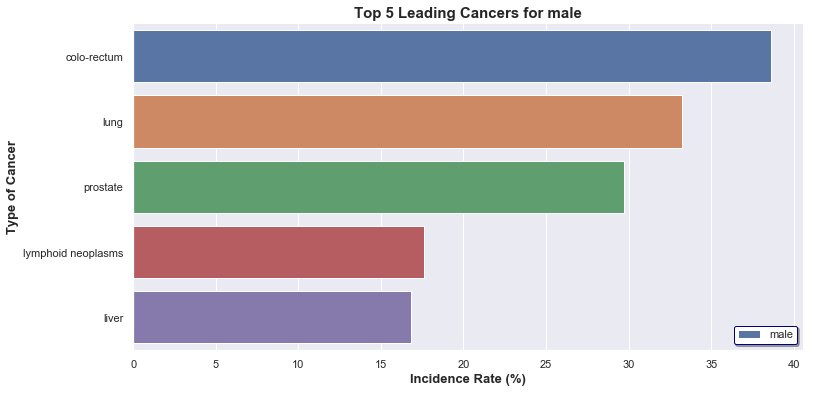

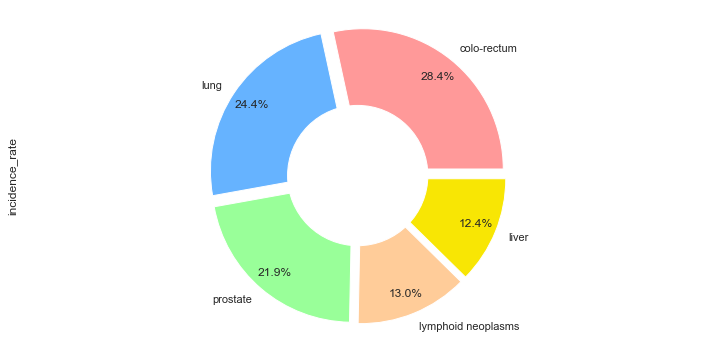

In [6]:
import mysql.connector as mysql
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def bar_chart(top_5_cancer_df, gender):
    sns.set(style = "darkgrid", rc = {'figure.figsize' : (12,6)})
    ax = sns.barplot(x = 'incidence_rate', y = 'type_of_cancer', data = top_5_cancer_df, label = gender, saturation = 0.75,
                orient = 'h')
    ax.set_title("Top 5 Leading Cancers for " + gender, fontsize = 15, fontweight = 'bold')
    ax.set_xlabel("Incidence Rate (%)", fontsize = 13, fontweight = 'bold')
    ax.set_ylabel("Type of Cancer", fontsize = 13, fontweight = 'bold')
    ax.legend(loc = 'lower right', facecolor = 'white', edgecolor = 'navy', shadow = True)
    sns.despine(top  =True, right = True, left = False, bottom = False)
    
    plt.show(ax)

def pie_chart(top_5_cancer_df):
    explode = (0.06, 0.06, 0.06, 0.06, 0.06)
    colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#f8e604']
    ax = top_5_cancer_df.plot(kind = 'pie', y = 'incidence_rate', autopct='%1.1f%%', colors = colors,
                               pctdistance=0.85, explode = explode, labels = top_5_cancer_df['type_of_cancer'], legend = False)
    centre_circle = plt.Circle((0,0),0.50,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    ax.axis('equal')
    
    plt.show(ax)


user, pw, host, db = 'root', '83219449dD$$', '127.0.0.1', 'moh_top_5_cancers'

mycursor = mysql.connect(user=user, password = pw, host=host, database = db)

print("***** Welcome to MOH Cancer DataBase in Singapore *****")
print("=================================================================")
gender = input("Enter either 'Male' or 'Female' to view the database: ")

sql = "SELECT * FROM cancers WHERE gender = '" + gender + "'"

top_5_cancer_df = pd.read_sql(sql, con = mycursor)
top_5_cancer_df = pd.DataFrame(top_5_cancer_df)
top_5_cancer_df = top_5_cancer_df.drop(columns = ['start_of_period', 'end_of_period'])

print()
print("Data Info for Top 5 Leading Cancers for " + gender + " : ")
print("-----------------------------------------------------------------")
print(top_5_cancer_df.info())
print()

print()
print("Data of the Top 5 Leading Cancers for " + gender + ": ")
print("------------------------------------------------------------------")
print(top_5_cancer_df)
print()

print("Numerical Summary for the Top 5 Leading Cancers for " + gender)
print("-------------------------------------------------------------------")
print(top_5_cancer_df['incidence_rate'].describe())
print()

print("Graphical Summary for the Top 5 Leading Cancers for " + gender)
print("-------------------------------------------------------------------")

### call function to display bar chart and pie chart
bar_chart(top_5_cancer_df, gender)
pie_chart(top_5_cancer_df)

mycursor.close()

## E) Delete Table in MySQL DataBase

In [7]:
import mysql.connector as mysql

user, pw, host, db = 'root', '83219449dD$$', '127.0.0.1', 'moh_top_5_cancers'

mycursor = mysql.connect(user=user, password = pw, host=host, database = db)
cursor = mycursor.cursor()

mysql = ("DROP TABLE cancers")

try:
    print("Execute MySQL to DELETE TABLE!")
    cursor.execute(mysql)
    mycursor.commit()
    print("Table Deleted!")
except:
    print("Unexpected Error!")
    exit()
finally:
    cursor.close()
    mycursor.close()

Execute MySQL to DELETE TABLE!
Table Deleted!


## F) Delete MySQL DataBase

In [8]:
import mysql.connector, sys

user, pw, host= 'root', '83219449dD$$', '127.0.0.1'

mycursor = mysql.connector.connect(user=user, password = pw, host=host)
cursor = mycursor.cursor()

mysql = ("DROP DATABASE moh_top_5_cancers")

try:
    print("Execute MySQL to delete database!")
    cursor.execute(mysql)
    mycursor.commit()
    print("DataBase Deleted!")
except:
    print("Unexpected Error!")
    exit()
finally:
    cursor.close()
    mycursor.close()

Execute MySQL to delete database!
DataBase Deleted!
